In [1]:
from pathlib import Path

import gspread
from oauth2client.service_account import ServiceAccountCredentials

import pandas as pd

In [2]:
pd.set_option('max_colwidth', 100) # 50 by default

### Get access to Google Sheets

In [3]:
KEY_PATH = '../keys/airflow_secret.json'

In [4]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name(KEY_PATH, scope)
client = gspread.authorize(creds)

In [5]:
TEST_URL = 'https://docs.google.com/spreadsheets/d/1Qxnc9bp8-5M3lSxzVDD817To5OEB3JkMG0XpFznrtD8/edit#gid=0'
# URL = 'https://docs.google.com/spreadsheets/d/1GE-4bLOuBOhMCGF-vGs7j2BTSdsgRmvKvDQhBqMkNuk/edit#gid=0'

In [6]:
sheet = client.open_by_url(TEST_URL).sheet1
sheet

<Worksheet 'Sheet1' id:0>

In [7]:
sheet_data = sheet.get_all_records(head=2)
sheet_data[:3]

[{'ссылка': 'https://habr.com/ru/company/wrike/blog/506928/',
  'Зимка Борис & Смирнов Максим': '',
  'Лабазкин Дмитрий & Хачатрян Екатерина': 'Hello',
  'Максим Ястремский & Кузнецов Дмитрий': '',
  'Юлия Пак': ''},
 {'ссылка': 'https://vimeo.com/91371852',
  'Зимка Борис & Смирнов Максим': '',
  'Лабазкин Дмитрий & Хачатрян Екатерина': 1,
  'Максим Ястремский & Кузнецов Дмитрий': '',
  'Юлия Пак': ''},
 {'ссылка': 'https://www.youtube.com/watch?v=vvdLLbhxwDA',
  'Зимка Борис & Смирнов Максим': '',
  'Лабазкин Дмитрий & Хачатрян Екатерина': 2,
  'Максим Ястремский & Кузнецов Дмитрий': '',
  'Юлия Пак': ''}]

In [8]:
sheet_df = pd.DataFrame(sheet_data)
sheet_df.columns = ['url', 'team_1', 'team_2', 'team_3', 'team_4']
print(len(sheet_df))
sheet_df.head()

2420


,url,team_1,team_2,team_3,team_4
0,https://habr.com/ru/company/wrike/blog/506928/,,Hello,,
1,https://vimeo.com/91371852,,1,,
2,https://www.youtube.com/watch?v=vvdLLbhxwDA,,2,,
3,https://www.youtube.com/watch?v=l5aw6LHt9iI,,3,,
4,https://habr.com/ru/post/193844/,,4,,


In [9]:
sheet.update_acell('C3', 'Hello')

{'spreadsheetId': '1Qxnc9bp8-5M3lSxzVDD817To5OEB3JkMG0XpFznrtD8',
 'updatedRange': 'Sheet1!C3',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

In [10]:
sheet.update('C10:C15', [[1], [2], [3], [4], [5], [5]])

{'spreadsheetId': '1Qxnc9bp8-5M3lSxzVDD817To5OEB3JkMG0XpFznrtD8',
 'updatedRange': 'Sheet1!C10:C15',
 'updatedRows': 6,
 'updatedColumns': 1,
 'updatedCells': 6}

### Explore URLs

In [11]:
from urllib.parse import urlparse

In [12]:
sheet_df

,url,team_1,team_2,team_3,team_4
0,https://habr.com/ru/company/wrike/blog/506928/,,Hello,,
1,https://vimeo.com/91371852,,1,,
2,https://www.youtube.com/watch?v=vvdLLbhxwDA,,2,,
3,https://www.youtube.com/watch?v=l5aw6LHt9iI,,3,,
4,https://habr.com/ru/post/193844/,,4,,
...,...,...,...,...,...
2415,https://rt.pornhub.com/view_video.php?viewkey=1266029882,,2415,,
2416,https://rutube.ru/video/30b4a32e310195d116f5dfc964c1a000/,,2416,,
2417,https://habr.com/ru/post/506464/,,2417,,
2418,https://pikabu.ru/story/pro_beshenuyu_ku_na_bmv_6219595,,2418,,


In [13]:
urls = sheet_df['url']
urls

0                      https://habr.com/ru/company/wrike/blog/506928/
1                                          https://vimeo.com/91371852
2                         https://www.youtube.com/watch?v=vvdLLbhxwDA
3                         https://www.youtube.com/watch?v=l5aw6LHt9iI
4                                    https://habr.com/ru/post/193844/
                                    ...                              
2415         https://rt.pornhub.com/view_video.php?viewkey=1266029882
2416        https://rutube.ru/video/30b4a32e310195d116f5dfc964c1a000/
2417                                 https://habr.com/ru/post/506464/
2418          https://pikabu.ru/story/pro_beshenuyu_ku_na_bmv_6219595
2419    https://rt.pornhub.com/view_video.php?viewkey=ph5c5861e4ecae2
Name: url, Length: 2420, dtype: object

In [14]:
parsed_urls_df = sheet_df['url'].apply(urlparse).apply(pd.Series)
parsed_urls_df.columns = ['scheme', 'netloc', 'path', 'params', 'query', 'fragment']
parsed_urls_df

,scheme,netloc,path,params,query,fragment
0,https,habr.com,/ru/company/wrike/blog/506928/,,,
1,https,vimeo.com,/91371852,,,
2,https,www.youtube.com,/watch,,v=vvdLLbhxwDA,
3,https,www.youtube.com,/watch,,v=l5aw6LHt9iI,
4,https,habr.com,/ru/post/193844/,,,
...,...,...,...,...,...,...
2415,https,rt.pornhub.com,/view_video.php,,viewkey=1266029882,
2416,https,rutube.ru,/video/30b4a32e310195d116f5dfc964c1a000/,,,
2417,https,habr.com,/ru/post/506464/,,,
2418,https,pikabu.ru,/story/pro_beshenuyu_ku_na_bmv_6219595,,,


In [15]:
parsed_urls_df['scheme'].value_counts()

https    2392
            4
rttps       2
hkkps       2
httls       2
hbbps       1
httpu       1
hwwps       1
httpd       1
httph       1
httfs       1
huups       1
hjjps       1
httas       1
httcs       1
hqqps       1
mttps       1
sttps       1
httrs       1
hggps       1
httbs       1
yttps       1
httpf       1
Name: scheme, dtype: int64

In [16]:
site_counts = parsed_urls_df['netloc'].value_counts()
site_counts[:50]

rt.pornhub.com     895
habr.com           431
rutube.ru          294
vimeo.com          280
www.youtube.com    270
pikabu.ru          182
                     4
rt.pornhun.com       2
mt.pomnhub.com       2
rt.pvrnhub.cvm       2
rftfbe.rf            2
rutubx.ru            1
rt.pornhub.aom       1
rt.pornhgb.com       1
rt.pornhub.coc       1
qt.poqnhub.com       1
rt.porghub.com       1
pieabu.ru            1
rt.pornyub.com       1
ru.pornhub.com       1
rt.rornhub.com       1
lutube.lu            1
rutuie.ru            1
rq.pornhub.com       1
rt.porkhub.com       1
pikdbu.ru            1
pnkabu.ru            1
rb.pornhub.com       1
rt.bornhub.com       1
pikadu.ru            1
rt.pornhub.cop       1
pivabu.ru            1
rt.porchub.com       1
rt.pornhub.hom       1
rt.pornhub.cor       1
rt.pornhug.com       1
ft.pofnhub.com       1
rt.porvhub.com       1
rt.pornhub.cok       1
rt.pornhux.com       1
rt.pornhzb.com       1
rt.pornhkb.com       1
habr.cjm             1
rt.pornhub.

In [28]:
correct_domains = site_counts[site_counts > 10].sort_index().index.tolist()
correct_domains

['habr.com',
 'pikabu.ru',
 'rt.pornhub.com',
 'rutube.ru',
 'vimeo.com',
 'www.youtube.com']

In [23]:
len(urls[urls.str.contains('habr.com')].tolist())

431

### Sites Parsing

In [29]:
import requests
from bs4 import BeautifulSoup

In [30]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.chrome.options import Options

**habr.com**

In [19]:
urls[urls.str.contains('habr')]

0          https://habr.com/ru/company/wrike/blog/506928/
4                        https://habr.com/ru/post/193844/
11                       https://habr.com/ru/post/496612/
13                       https://habr.com/ru/post/481488/
18                       https://habr.com/ru/post/491974/
                              ...                        
2396                     https://habr.com/ru/post/506902/
2402                     https://habr.com/ru/post/507124/
2403       https://habr.com/ru/company/vrike/blog/506928/
2406    https://habr.com/ru/company/skilline/blog/506522/
2417                     https://habr.com/ru/post/506464/
Name: url, Length: 434, dtype: object

In [20]:
url = 'https://habr.com/ru/company/wrike/blog/506928/'

In [21]:
html_text = requests.get(url).text
html_text[:15]

'<!DOCTYPE html>'

In [22]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find('span', class_="post-stats__views-count").text

'505'

**pikabu.ru**

In [23]:
urls[urls.str.contains('pikabu')]

807                                                    https://pikabu.ru/story/moderator_vs_zombies_2177316
814                 https://pikabu.ru/story/kak_ya_uznal_ob_izmene_ili_lyogkiy_sposob_brosit_shutit_7471791
816                                       https://pikabu.ru/story/budet_li_otvet_ot_kospleyshchikov_7366977
833     https://pikabu.ru/story/moskovskogo_gaishnika_zastavili_pisat_obyasnitelnuyu__on_ostanovil_zamgl...
836                                                         https://pikabu.ru/story/mashkina_radost_6977120
                                                       ...                                                 
2382                                                                  https://pikabu.ru/story/genyi_6306182
2401                  https://pikabu.ru/story/o_dvulichii_pikabu_na_primere_shashlyichnika_magomeda_5753834
2410    https://pikabu.ru/story/kak_obmanut_na_millionyi_rubley_popast_na_pervyiy_kanal_i_stat_uspeshnyi...
2412                        

In [24]:
# url = 'https://pikabu.ru/story/moderator_vs_zombies_2177316' # without link
url = 'https://pikabu.ru/story/budet_li_otvet_ot_kospleyshchikov_7366977' # with link

headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'}

html_text = requests.get(url, headers=headers).text
html_text[:15]

'<!doctype html>'

In [25]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find('div', class_="story__views-count")

In [27]:
chrome_options = Options()
chrome_options.headless = True
chrome_options.add_argument('--no-proxy-server') 
chrome_options.add_argument("--proxy-server='direct://'")
chrome_options.add_argument("--proxy-bypass-list=*")

browser = webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)

browser.get(url)
print(browser.find_element_by_class_name('story__views-count').text)
browser.quit()

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103


[WDM] - Trying to download new driver from http://chromedriver.storage.googleapis.com/83.0.4103.39/chromedriver_linux64.zip
[WDM] - Driver has been saved in cache [/home/jupyter/.wdm/drivers/chromedriver/linux64/83.0.4103.39]


617K


**pornhub.com**

In [28]:
urls[urls.str.contains('pornhub')]

804     https://rt.pornhub.com/view_video.php?viewkey=ph5c66c76a1dc69
808     https://rt.pornhub.com/view_video.php?viewkey=ph5ed519f129f7d
809     https://rt.pornhub.com/view_video.php?viewkey=ph5ed77e4eb5c46
811     https://rt.pornhub.com/view_video.php?viewkey=ph5de9edb65e918
812     https://rt.pornhub.com/view_video.php?viewkey=ph5ed62c5f32084
                                    ...                              
2407    https://rt.pornhub.com/view_video.php?viewkey=ph5cb96e2dc6919
2413    https://rt.pornhub.com/view_video.php?viewkey=ph5e7e26e5791b5
2414    https://rt.pornhub.com/view_video.php?viewkey=ph5eca2f9fd16fc
2415         https://rt.pornhub.com/view_video.php?viewkey=1266029882
2419    https://rt.pornhub.com/view_video.php?viewkey=ph5c5861e4ecae2
Name: url, Length: 909, dtype: object

In [29]:
url = 'https://rt.pornhub.com/view_video.php?viewkey=ph5c66c76a1dc69'

In [30]:
html_text = requests.get(url).text
html_text[:15]

'<!DOCTYPE html>'

In [31]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find('span', class_="count").text

'644 482'

**rutube.ru**

In [32]:
urls[urls.str.contains('rutube')]

810     https://rutube.ru/video/8ba9b27f20c3a361bb02e91b7e74df05/
819     https://rutube.ru/video/fd0f357686152efe46d0c6a9eb9f8e8e/
821     https://rutube.ru/video/56868c5e19b6959a12748de745764414/
825     https://rutube.ru/video/4a625fc2a5af8295d0262cbcb2323177/
828     https://rutube.ru/video/89466964caf92d941cebe8c3b230889c/
                                  ...                            
2393    https://rutube.ru/video/0d67f4e0c226c83505b852f7f979ee8d/
2408    https://rutube.ru/video/0de88da646561c52203b7d0752701429/
2409    https://rutube.ru/vddeo/38fe90ef57b50093a9ec75fe610d4e49/
2411    https://rutube.ru/videy/801f087fcc57e58e78c1419bf0a5bd91/
2416    https://rutube.ru/video/30b4a32e310195d116f5dfc964c1a000/
Name: url, Length: 294, dtype: object

In [33]:
url = 'https://rutube.ru/video/8ba9b27f20c3a361bb02e91b7e74df05/'

In [34]:
html_text = requests.get(url).text
html_text[:15]

'<!DOCTYPE html>'

In [35]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find('span', class_="video-info-card__view-count").text

'22,327'

**vimeo.com**

In [15]:
urls[urls.str.contains('vimeo')]

1       https://vimeo.com/91371852
5        https://vimeo.com/4085044
8       https://vimeo.com/33717000
12     https://vimeo.com/288392170
14     https://vimeo.com/200162057
                  ...             
783    https://vimeo.com/331606787
788    https://vimeo.com/326073569
796    https://vimeo.com/775617275
797    https://vimeo.com/120071239
801    https://vimeo.com/212496746
Name: url, Length: 280, dtype: object

In [31]:
proxies_html = requests.get('https://sslproxies.org/').text
proxies_df = pd.read_html(proxies_html)[0]
proxies_df

,IP Address,Port,Code,Country,Anonymity,Google,Https,Last Checked
0,177.92.20.182,40787.0,BR,Brazil,elite proxy,no,yes,29 seconds ago
1,103.107.92.1,43255.0,IN,India,elite proxy,no,yes,29 seconds ago
2,195.138.73.54,59224.0,UA,Ukraine,elite proxy,no,yes,1 minute ago
3,103.25.167.200,40809.0,ID,Indonesia,elite proxy,no,yes,1 minute ago
4,77.94.107.148,45016.0,RU,Russian Federation,elite proxy,no,yes,1 minute ago
...,...,...,...,...,...,...,...,...
96,190.186.1.46,37607.0,BO,Bolivia,elite proxy,no,yes,30 minutes ago
97,197.245.230.122,42738.0,ZA,South Africa,elite proxy,no,yes,30 minutes ago
98,43.248.24.157,51166.0,ID,Indonesia,elite proxy,no,yes,30 minutes ago
99,36.67.246.50,48378.0,ID,Indonesia,elite proxy,no,yes,30 minutes ago


In [35]:
url = 'https://vimeo.com/91371852'

headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'}
proxies={'http': '103.107.92.1:43255', 'https': '103.107.92.1:43255'}

html_text = requests.get(url, headers=headers, proxies=proxies).text
html_text

'<!doctype html>\n<html lang="en">\n<head>\n\t<meta name="robots" content="noindex, nofollow">\n\t<title>Verify to Continue</title>\n\n\t<script src="https://www.google.com/recaptcha/api.js?hl=en"></script>\n\t<script type=\'text/javascript\'>\n\t    var done = function() {\n\t\t\tdocument.getElementById(\'form\').submit();\n\t    };\n    </script>\n\n\t<style type="text/css">\n\t\tbody {\n\t\t\tbackground: #141531;\n\t\t\tfont-family: helvetica, arial, san-serif;\n\t\t\tfont-size: 18px;\n\t\t\tfont-weight: normal;\n\t\t\tcolor: #fff;\n\t\t}\n\t\tp {\n\t\t\tmargin: 0 0 25px 0;\n\t\t}\n\t\tsvg {\n\t\t\tmargin: 75px;\n\t\t\twidth: 250px;\n\t\t}\n\t\tdiv.content {\n\t\t\tmargin: 75px;\n\t\t\tposition: absolute;\n\t\t\tbottom: 0px;\n\t\t}\n\t\tdiv.g-recaptcha {\n\t\t\twidth: 304px;\n\t\t\theight: 78px;\n\t\t}\n\t</style>\n</head>\n<body>\n\t<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 140 40" preserveAspectRatio="xMinYMin none"><path fill="#fff" d="M31.277 18.832c-.14 3.052-2.27 7.

In [21]:
soup = BeautifulSoup(html_text, 'lxml')

NameError: name 'html_text' is not defined

In [20]:
import re

# regex = re.compile(r'15.3K Views')
soup.find('span', aria_label='15.3K Views')

NameError: name 'soup' is not defined

In [48]:
chrome_options = Options()
chrome_options.headless = True
chrome_options.add_argument('--no-proxy-server') 
chrome_options.add_argument("--proxy-server='direct://'")
chrome_options.add_argument("--proxy-bypass-list=*")

browser = webdriver.Chrome(ChromeDriverManager().install(),options=chrome_options)

browser.get(url)

[WDM] - Current google-chrome version is 83.0.4103
[WDM] - Get LATEST driver version for 83.0.4103
[WDM] - Driver [/home/jupyter/.wdm/drivers/chromedriver/linux64/83.0.4103.39/chromedriver] found in cache


In [49]:
from IPython.display import Image

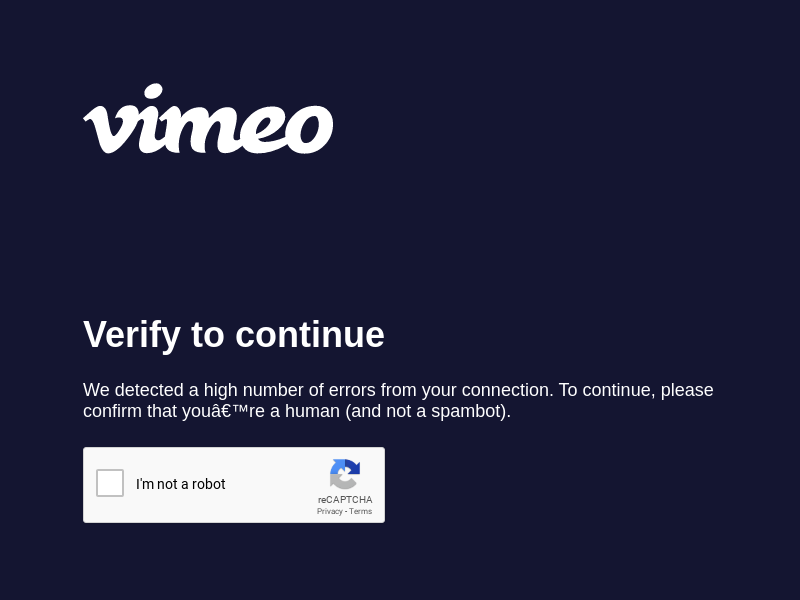

In [50]:
screenshot = browser.get_screenshot_as_png()
Image(data=screenshot) 

**youtube.com**

In [24]:
urls[urls.str.contains('youtube')]

2             https://www.youtube.com/watch?v=vvdLLbhxwDA
3             https://www.youtube.com/watch?v=l5aw6LHt9iI
6             https://www.youtube.com/watch?v=U4kyT-wwEi0
7             https://www.youtube.com/watch?v=-UuXFqXp7P4
9             https://www.youtube.com/watch?v=wW9trOm303g
                              ...                        
790           https://www.youtube.com/watch?v=1k5f5rgyzsE
793           https://www.youtube.com/watch?v=_yolSUYe6B0
798           https://www.youtube.com/watch?v=T7TcQLwCyWM
800           https://www.youtube.com/watch?v=KJEtl2dPgTM
803    https://www.youtube.com/watch?v=VfjUobcvjYk&t=104s
Name: url, Length: 270, dtype: object

In [25]:
url = 'https://www.youtube.com/watch?v=vvdLLbhxwDA'
headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'}

Not stable to retreive for the same URL

In [26]:
html_text = requests.get(url).text
print(html_text[:100])

soup = BeautifulSoup(html_text, 'lxml')
soup.find('span', class_="view-count").text

NameError: name 'requests' is not defined

In [ ]:
html_text